In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix,classification_report

## Dataset setting

In [2]:
pre = pd.read_csv('kd_data.csv')

pre_df = pd.DataFrame(pre)

pre_df

,person_id,gender,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,...,Malignant neoplastic disease,Chronic liver disease,chronic obstructive lung disease,cerebrovascular disease,chronic kidney disease,Diabetes mellitus,Ischemic heart disease,hyperlipidemia,Hypertensive disorder,cancer
0,1673221,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1289235,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1690134,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,530465,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,737827,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1756845,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
405,14298,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406,1646575,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
407,352251,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
pre_df.columns

Index(['person_id', 'gender', 'age_1', 'age_2', 'age_3', 'age_4', 'age_5',
       'age_6', 'age_7', 'age_8', 'smoking_status_0', 'smoking_status_1',
       'smoking_status_2', 'smoking_status_3', 'bmi_1.0', 'bmi_2.0', 'bmi_3.0',
       'bmi_4.0', 'Malignant neoplastic disease', 'Chronic liver disease',
       'chronic obstructive lung disease', 'cerebrovascular disease',
       'chronic kidney disease', 'Diabetes mellitus', 'Ischemic heart disease',
       'hyperlipidemia', 'Hypertensive disorder', 'cancer'],
      dtype='object')

In [4]:
pre_df.shape

(409, 28)

## Train/Test data split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# train : test = 7 : 3
X_train, x_test, Y_train, y_test = train_test_split(pre_df.iloc[:,1:27],pre_df['cancer'], test_size=0.3, stratify=pre_df['cancer'],random_state=3)

In [8]:
# train : validation = 7 : 3
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.3, stratify=Y_train,random_state=3)

In [11]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_valid dataset: ", x_valid.shape)
print("Number transactions y_valid dataset: ", y_valid.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Numbertransactions  y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (200, 26)
Number transactions y_train dataset:  (200,)
Number transactions x_valid dataset:  (86, 26)
Number transactions y_valid dataset:  (86,)
Number transactions x_test dataset:  (123, 26)
Numbertransactions  y_test dataset:  (123,)


In [12]:
print(Counter(y_train))
print(Counter(y_valid))
print(Counter(y_test))

Counter({0: 157, 1: 43})
Counter({0: 67, 1: 19})
Counter({0: 96, 1: 27})


## Class Weight

In [13]:
from sklearn.utils import class_weight

In [14]:
class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(y_train),y=y_train)
class_weights

array([0.63694268, 2.3255814 ])

In [15]:
class_dict = {k:v for k,v in enumerate(class_weights)}
class_dict

{0: 0.6369426751592356, 1: 2.3255813953488373}

## SVM

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
#Linear SVM을 위한 적절한 C값  검색
#분류:SVC

for k in ['poly','rbf']:
    for thisC in range(1,10):
        for thisG in [0.1, 0.25, 0.5, 1]:
            svc=SVC(kernel=k,C=thisC, gamma=thisG, class_weight = class_dict)
            model=svc.fit(x_train, y_train)
            scoreTrain=model.score(x_train, y_train)
            scoreTest=model.score(x_valid, y_valid)
            Y_pred = model.predict(x_valid)
            print(classification_report(y_valid,Y_pred))
            print("SVM : kernel:{}, C:{}, Gamma:{}, training score:{:2f}, test score:{:2f}".format
                  (k,thisC,thisG,scoreTrain, scoreTest))

              precision    recall  f1-score   support

           0       1.00      0.09      0.16        67
           1       0.24      1.00      0.38        19

    accuracy                           0.29        86
   macro avg       0.62      0.54      0.27        86
weighted avg       0.83      0.29      0.21        86

SVM : kernel:poly, C:1, Gamma:0.1, training score:0.320000, test score:0.290698
              precision    recall  f1-score   support

           0       0.93      0.75      0.83        67
           1       0.47      0.79      0.59        19

    accuracy                           0.76        86
   macro avg       0.70      0.77      0.71        86
weighted avg       0.82      0.76      0.77        86

SVM : kernel:poly, C:1, Gamma:0.25, training score:0.875000, test score:0.755814
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        67
           1       0.44      0.79      0.57        19

    accuracy         

In [ ]:
svc=SVC(kernel='rbf',C=9, gamma=0.1, class_weight = class_dict,probability=True)
model=svc.fit(x_train,y_train)

In [ ]:
Y_pred = model.predict(x_valid)

In [ ]:
Y_pred = [ 1 if x >= 0.5 else 0 for x in Y_pred]

In [ ]:
confusion_matrix(y_valid,Y_pred,labels=[1,0])
print(classification_report(y_valid,Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        67
           1       0.64      0.74      0.68        19

    accuracy                           0.85        86
   macro avg       0.78      0.81      0.79        86
weighted avg       0.86      0.85      0.85        86



In [ ]:
fpr, tpr, thresholds =roc_curve(y_valid, model.predict_proba(x_valid)[:,1])

score = auc(fpr, tpr)
print("AUC : ", score)

AUC :  0.8468185388845247


### Evaluation

In [ ]:
Y_pred1 = model.predict(x_test)

In [ ]:
Y_pred1 = [ 1 if x >= 0.5 else 0 for x in Y_pred1]

In [ ]:
confusion_matrix(y_test,Y_pred1,labels=[1,0])
print(classification_report(y_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86        96
           1       0.50      0.52      0.51        27

    accuracy                           0.78       123
   macro avg       0.68      0.69      0.68       123
weighted avg       0.78      0.78      0.78       123



In [ ]:
fpr, tpr, thresholds =roc_curve(y_valid, model.predict_proba(x_valid)[:,1])

score = auc(fpr, tpr)
print("AUC : ", score)

AUC :  0.8468185388845247


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

In [ ]:
scores = []
for tree in range(1,30):
    clf = RandomForestClassifier(n_estimators=100, max_depth=tree,random_state=0, class_weight = class_dict)
    model=clf.fit(x_train,y_train)
    scoreTrain=model.score(x_train,y_train)
    scoreTest=model.score(x_valid,y_valid)
    Y_pred = model.predict(x_valid)
    print(classification_report(y_valid,Y_pred))
    fpr, tpr, thresholds =roc_curve(y_valid, model.predict_proba(x_valid)[:,1])
    print("AUC : {}".format(auc(fpr, tpr)))
    print("RF : Tree Depth:{}, training score:{:2f}, test score:{:2f}".format
            (tree,scoreTrain, scoreTest))
    scores.append([scoreTrain, scoreTest])

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        67
           1       0.54      0.74      0.62        19

    accuracy                           0.80        86
   macro avg       0.73      0.78      0.74        86
weighted avg       0.83      0.80      0.81        86

AUC : 0.8460329929300864
RF : Tree Depth:1, training score:0.800000, test score:0.802326
              precision    recall  f1-score   support

           0       0.93      0.81      0.86        67
           1       0.54      0.79      0.64        19

    accuracy                           0.80        86
   macro avg       0.73      0.80      0.75        86
weighted avg       0.84      0.80      0.81        86

AUC : 0.8499607227022782
RF : Tree Depth:2, training score:0.805000, test score:0.802326
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        67
           1       0.56      0.79      0.65        19

    

In [ ]:
clf = RandomForestClassifier(n_estimators=100,random_state=0,max_depth=8, class_weight = class_dict)
model=clf.fit(x_train, y_train)

In [ ]:
Y_pred = model.predict(x_valid)

In [ ]:
confusion_matrix(y_valid,Y_pred,labels=[1,0])
print(classification_report(y_valid,Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        67
           1       0.64      0.74      0.68        19

    accuracy                           0.85        86
   macro avg       0.78      0.81      0.79        86
weighted avg       0.86      0.85      0.85        86



In [ ]:
fpr, tpr, thresholds =roc_curve(y_valid, model.predict_proba(x_valid)[:,1])

score = auc(fpr, tpr)
print("AUC : ", score)

AUC :  0.8546739984289081


### Evaluation

In [ ]:
Y_pred1 = model.predict(x_test)

In [ ]:
confusion_matrix(y_test,Y_pred1,labels=[1,0])
print(classification_report(y_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        96
           1       0.52      0.48      0.50        27

    accuracy                           0.79       123
   macro avg       0.69      0.68      0.68       123
weighted avg       0.78      0.79      0.79       123



In [ ]:
fpr, tpr, thresholds =roc_curve(y_test, model.predict_proba(x_test)[:,1])

score = auc(fpr, tpr)
print("AUC : ", score)

AUC :  0.7717978395061728


## DNN

In [ ]:
pre = pd.read_csv('kd_data_1226.csv')

pre_df = pd.DataFrame(pre)

pre_df

,person_id,gender,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,...,Malignant neoplastic disease,Chronic liver disease,chronic obstructive lung disease,cerebrovascular disease,chronic kidney disease,Diabetes mellitus,Ischemic heart disease,hyperlipidemia,Hypertensive disorder,cancer
0,1673221,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1289235,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1690134,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,530465,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,737827,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1756845,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
405,14298,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406,1646575,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
407,352251,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
pre_df.columns = ['person_id', 'gender', 'age_1', 'age_2', 'age_3', 'age_4', 'age_5',
       'age_6', 'age_7', 'age_8', 'smoking_status_0.0', 'smoking_status_1.0',
       'smoking_status_2.0', 'smoking_status_3.0', 'bmi_1.0', 'bmi_2.0', 'bmi_3.0',
       'bmi_4.0', 'Malignant_neoplastic_disease', 'Chronic_liver_disease',
       'chronic_obstructive_lung_disease', 'cerebrovascular_disease',
       'chronic_kidney_disease', 'Diabetes_mellitus', 'Ischemic_heart_disease',
       'hyperlipidemia', 'Hypertensive_disorder', 'cancer']

In [17]:
pre_df = pre_df.astype('int64')

### Normalization & Metrics

In [18]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing

In [19]:
def get_normalization_layer(name, dataset):
    # Create a Normalization layer for our feature.
    normalizer = preprocessing.Normalization()

    # Prepare a Dataset that only yields our feature.
    feature_ds = dataset.map(lambda x, y: x[name])

    # Learn the statistics of the data.
    normalizer.adapt(feature_ds)

    return normalizer

In [20]:
def get_category_encoding_layer(name, dataset, dtype, num_tokens=None):
    # Create a StringLookup layer which will turn strings into integer indices
    if dtype == 'string':
        index = preprocessing.StringLookup(num_tokens=num_tokens)
    else:
        index = preprocessing.IntegerLookup(max_values=num_tokens)

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])

    # Learn the set of possible values and assign them a fixed integer index.
    index.adapt(feature_ds)

    # Create a Discretization for our integer indices.
    encoder = preprocessing.CategoryEncoding(num_tokens=index.vocabulary_size())

    # Apply one-hot encoding to our indices. The lambda function captures the
    # layer so we can use them, or include them in the functional model later.

    return lambda feature: encoder(index(feature))

In [21]:
METRICS = [
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'),
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import metrics
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [23]:
def plot_metrics(history):
    metrics = ['loss', 'auc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[1], label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

    plt.legend()

In [24]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('cancer')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)

    return ds

In [25]:
train, test = train_test_split(pre_df, test_size=0.3, random_state=3, stratify=pre_df['cancer'])
train, val = train_test_split(train, test_size=0.3, random_state=3, stratify=train['cancer'])
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

200 train examples
86 validation examples
123 test examples


### Create Layer

In [26]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.utils import class_weight
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import L1, L2, L1L2
from sklearn.utils import class_weight

In [27]:
# mini_batch
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)

[(train_features, label_batch)] = train_ds.take(1)
print('Every feature:', list(train_features.keys()))
print('A batch of gender:', train_features['gender'])
print('A batch of targets:', label_batch )

Every feature: ['person_id', 'gender', 'age_1', 'age_2', 'age_3', 'age_4', 'age_5', 'age_6', 'age_7', 'age_8', 'smoking_status_0.0', 'smoking_status_1.0', 'smoking_status_2.0', 'smoking_status_3.0', 'bmi_1.0', 'bmi_2.0', 'bmi_3.0', 'bmi_4.0', 'Malignant_neoplastic_disease', 'Chronic_liver_disease', 'chronic_obstructive_lung_disease', 'cerebrovascular_disease', 'chronic_kidney_disease', 'Diabetes_mellitus', 'Ischemic_heart_disease', 'hyperlipidemia', 'Hypertensive_disorder']
A batch of gender: tf.Tensor([0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0], shape=(32,), dtype=int64)
A batch of targets: tf.Tensor([0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0], shape=(32,), dtype=int64)


In [28]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
valid_ds = df_to_dataset(val, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)
all_ds = df_to_dataset(pre_df, shuffle=False, batch_size=batch_size)

In [29]:
[(_, label)] = train_ds.take(1)
y_label = np.array(label)

In [30]:
class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(y_train),y=y_train)
class_weights

array([0.63694268, 2.3255814 ])

In [31]:
class_weights = {0:class_weights[0], 1:class_weights[1]}

In [32]:
categorical_cols = [ 'gender', 'age_1', 'age_2', 'age_3', 'age_4',
       'age_5', 'age_6', 'age_7', 'age_8', 'smoking_status_0.0',
       'smoking_status_1.0', 'smoking_status_2.0', 'smoking_status_3.0',
       'bmi_1.0', 'bmi_2.0', 'bmi_3.0', 'bmi_4.0',
       'Malignant_neoplastic_disease', 'Chronic_liver_disease',
       'chronic_obstructive_lung_disease', 'cerebrovascular_disease',
       'chronic_kidney_disease', 'Diabetes_mellitus',
       'Ischemic_heart_disease', 'hyperlipidemia', 'Hypertensive_disorder']

In [33]:
all_inputs = []
encoded_features = []

# Numeric features.
for header in categorical_cols:
    print(header)
    categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='int64')

    # Create the encoding layer using your function
    encoding_layer = get_category_encoding_layer(header, train_ds, dtype='int64')

    # Apply the encoding layer to the input column
    encoded_categorical_col = encoding_layer(categorical_col)

    all_inputs.append(categorical_col)
    encoded_features.append(encoded_categorical_col)

gender
age_1
age_2
age_3
age_4
age_5
age_6
age_7
age_8
smoking_status_0.0
smoking_status_1.0
smoking_status_2.0
smoking_status_3.0
bmi_1.0
bmi_2.0
bmi_3.0
bmi_4.0
Malignant_neoplastic_disease
Chronic_liver_disease
chronic_obstructive_lung_disease
cerebrovascular_disease
chronic_kidney_disease
Diabetes_mellitus
Ischemic_heart_disease
hyperlipidemia
Hypertensive_disorder


In [34]:
#def create_model(): #, kernel_regularizer=L2(0.001)
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(256, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)

x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)

x = tf.keras.layers.Dense(16, activation="relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(8, activation="relu")(x)

output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(all_inputs, output)
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=METRICS)

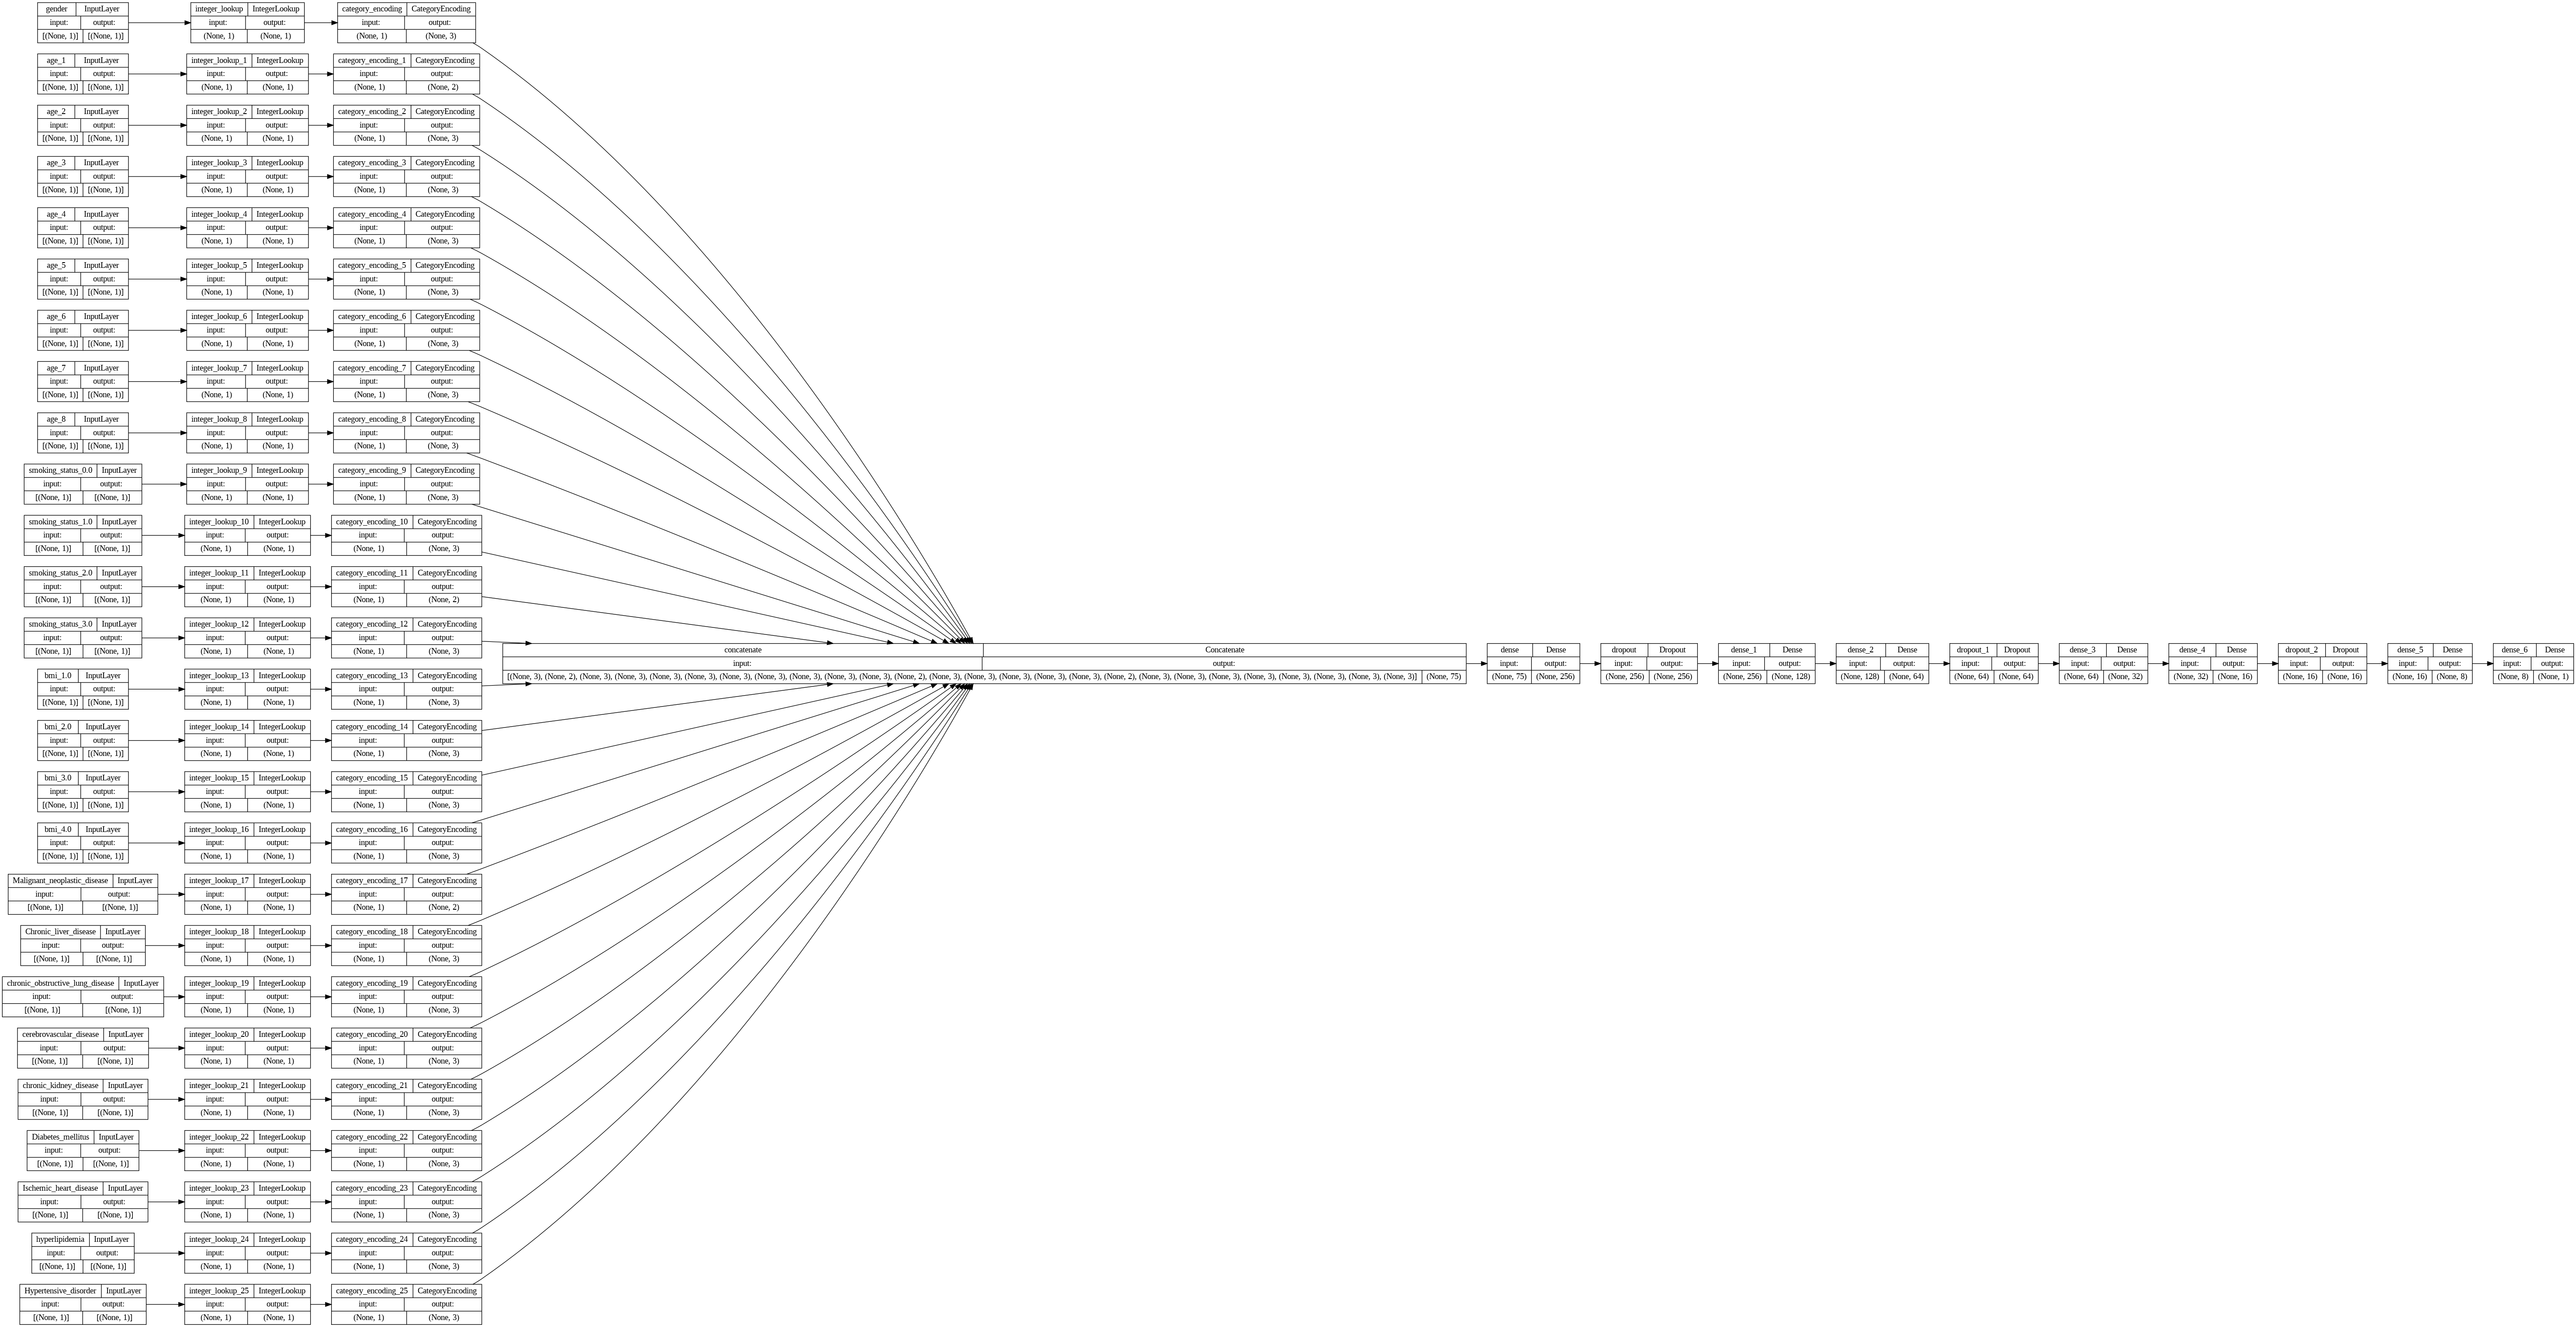

In [35]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [36]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [ ]:
history = model.fit(train_ds, epochs=100, validation_data=valid_ds,callbacks=[early_stopping],class_weight = class_weights)

Epoch 1/100
7/7 [==============================] - 0s 20ms/step - loss: 0.3453 - recall: 0.8605 - precision: 0.6066 - tp: 37.0000 - fp: 24.0000 - tn: 133.0000 - fn: 6.0000 - accuracy: 0.8500 - auc: 0.9314 - prc: 0.7401 - val_loss: 0.5297 - val_recall: 0.6842 - val_precision: 0.6190 - val_tp: 13.0000 - val_fp: 8.0000 - val_tn: 59.0000 - val_fn: 6.0000 - val_accuracy: 0.8372 - val_auc: 0.8562 - val_prc: 0.6894
Epoch 2/100
7/7 [==============================] - 0s 22ms/step - loss: 0.3313 - recall: 0.8140 - precision: 0.7292 - tp: 35.0000 - fp: 13.0000 - tn: 144.0000 - fn: 8.0000 - accuracy: 0.8950 - auc: 0.9300 - prc: 0.7271 - val_loss: 0.4766 - val_recall: 0.6842 - val_precision: 0.6190 - val_tp: 13.0000 - val_fp: 8.0000 - val_tn: 59.0000 - val_fn: 6.0000 - val_accuracy: 0.8372 - val_auc: 0.8480 - val_prc: 0.6764
Epoch 3/100
7/7 [==============================] - 0s 22ms/step - loss: 0.4024 - recall: 0.7209 - precision: 0.5439 - tp: 31.0000 - fp: 26.0000 - tn: 131.0000 - fn: 12.0000 - a

In [38]:
valid = df_to_dataset(val, batch_size=len(val),shuffle=False)

In [ ]:
pred = model.predict(valid)
pred = [ 1 if x >= 0.5 else 0 for x in pred]


[(_, label)] = valid.take(1)
print(confusion_matrix(label,pred,labels=[1,0]))
print(classification_report(label,pred))

1/1 [==============================] - 0s 33ms/step
[[18  1]
 [26 41]]
              precision    recall  f1-score   support

           0       0.98      0.61      0.75        67
           1       0.41      0.95      0.57        19

    accuracy                           0.69        86
   macro avg       0.69      0.78      0.66        86
weighted avg       0.85      0.69      0.71        86



### Evaluation

In [40]:
testing = df_to_dataset(test, batch_size=len(test),shuffle=False)

In [41]:
pred = model.predict(testing)
pred = [ 1 if x >= 0.5 else 0 for x in pred]


[(_, label)] = testing.take(1)
print(confusion_matrix(label,pred,labels=[1,0]))
print(classification_report(label,pred))

1/1 [==============================] - 0s 34ms/step
[[26  1]
 [51 45]]
              precision    recall  f1-score   support

           0       0.98      0.47      0.63        96
           1       0.34      0.96      0.50        27

    accuracy                           0.58       123
   macro avg       0.66      0.72      0.57       123
weighted avg       0.84      0.58      0.60       123



In [ ]:
pred = model.predict(testing)

fpr, tpr, thresholds =roc_curve(label, pred)

score = auc(fpr, tpr)
print("AUC : ", score)

1/1 [==============================] - 0s 27ms/step
AUC :  0.8190586419753086
